## This notebook should demonstrate functioning of Electrification score system
It consists of two parts - one for the demonstration of the score and
one for generating the graphs used in the bachelor thesis.
### Demonstration of the scoring system
Because this is only demonstrator it does not work with real data.
Also instead of datetimes it only work with timeline where starting point = 0  
Delay is always >= 0 even when car arrives before time specified by agenda.  
Duration is always >= 0 and > delay  
bev actions and icev actions must contain same amount of (matching) activities  
Sum of values of subscores should always be equal to 100 (if it is not it will be reweighted)

In [241]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [242]:
import score_demonstration as sc
import matplotlib.pyplot as plt

Here you could try the functionality of the scoring system by
making simple changes to the demonstration action set (for example set
delay of the first BEV activity to 15, duration to 60
and observe what it does to the score)

In [243]:
bev_actions = [{'type':'DRIVE', 'duration':50, 'kwh':6, 'km':80},
               {'type':'ACTIVITY', 'delay':5, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'kwh':7, 'km':80},
               {'type':'ACTIVITY', 'delay':10, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'kwh':7, 'km':80},
               {'type':'ACTIVITY', 'delay':10, 'duration':5},
               {'type':'DRIVE', 'duration':150, 'kwh':20, 'km':180},
               {'type':'ACTIVITY', 'delay':30, 'duration':5}
               ]
icev_actions = [{'type':'DRIVE', 'duration':45, 'km':80},
               {'type':'ACTIVITY', 'delay':0, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'km':80},
               {'type':'ACTIVITY', 'delay':5, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'km':80},
               {'type':'ACTIVITY', 'delay':5, 'duration':5},
               {'type':'DRIVE', 'duration':120, 'km':200},
               {'type':'ACTIVITY', 'delay':0, 'duration':5}
               ]
icev_per100_consumption = 9
icev_perliter_pol = 2310
bev_perkwh_pol = 780
kwh_price = 3
liter_gas_price = 30
values = {'time':45, 'delay':30, 'price':15, 'green':10}

In [244]:
score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
print('{} out of 100'.format(score))
for k in values.keys():
    print('{} score is {} out of {}'.format(k,subscores[k], values[k]))

75.48530201191684 out of 100
time score is 39.473684210526315 out of 45
delay score is 15.9375 out of 30
price score is 13.484848484848484 out of 15
green score is 6.589269316542044 out of 10


### Graphs for the bachelor thesis
This section is used for the creation of the graphs used in the bachelor thesis.
It should not be modified in any way.
If you want to regenerate the graphs rerun all sections below!

In [245]:
# preset values
icev_per100_consumption = 9
icev_perliter_pol = 2310
bev_perkwh_pol = 780
kwh_price = 3
liter_gas_price = 30
values = {'time':45, 'delay':30, 'price':15, 'green':10}

In [246]:
bev_actions_puv = [{'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
icev_actions_puv = [{'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
max_lim_range = 201

In [247]:
values = {'time':45, 'delay':30, 'price':15, 'green':10}
bev_actions = bev_actions_puv.copy()
icev_actions = icev_actions_puv.copy()
scoresf = []
delaysbsf = []
pricesbsf = []
greensbsf = []
timesbsf = []
for i in range(0, max_lim_range):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    bev_actions[0]['duration'] +=1
    bev_actions[0]['km'] +=1
    bev_actions[0]['kwh'] += 13/100
    delaysbsf.append(subscores['delay'])
    pricesbsf.append(subscores['price'])
    timesbsf.append(subscores['time'])
    greensbsf.append(subscores['green'])
    scoresf.append(score)

In [248]:
values = {'time':45, 'delay':30, 'price':15, 'green':10}
bev_actions_puv = [{'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
icev_actions_puv = [{'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]

In [249]:
bev_actions = bev_actions_puv.copy()
icev_actions = icev_actions_puv.copy()
scoresf2 = []
delaysbsf2 = []
pricesbsf2 = []
greensbsf2 = []
timesbsf2 = []
for i in range(0, max_lim_range):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    bev_actions[3]['delay'] += 1
    bev_actions[0]['duration'] +=1
    bev_actions[0]['km'] +=1
    bev_actions[0]['kwh'] += 13/100
    delaysbsf2.append(subscores['delay'])
    pricesbsf2.append(subscores['price'])
    timesbsf2.append(subscores['time'])
    greensbsf2.append(subscores['green'])
    scoresf2.append(score)

In [250]:
values = {'time':45, 'delay':30, 'price':15, 'green':10}
bev_actions_puv = [{'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
icev_actions_puv = [{'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]

In [251]:
bev_actions = bev_actions_puv.copy()
icev_actions = icev_actions_puv.copy()
scoresf3 = []
delaysbsf3 = []
pricesbsf3 = []
greensbsf3 = []
timesbsf3 = []
for i in range(0, max_lim_range):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    bev_actions[3]['delay'] += 1
    bev_actions[5]['delay'] += 1
    bev_actions[0]['duration'] +=1
    bev_actions[0]['km'] +=1
    bev_actions[0]['kwh'] += 13/100
    delaysbsf3.append(subscores['delay'])
    pricesbsf3.append(subscores['price'])
    timesbsf3.append(subscores['time'])
    greensbsf3.append(subscores['green'])
    scoresf3.append(score)

In [252]:
plt.plot(range(0,max_lim_range), delaysbsf, 'b')
plt.plot(range(0,max_lim_range), delaysbsf2, 'g')
plt.plot(range(0,max_lim_range), delaysbsf3, 'r')
plt.yticks(range(-25,36, 5))
plt.ylim([-26,36])
plt.title('Delay scores comparison based on delay "transfering"')
plt.xlabel("Additional length [km]")
plt.ylabel("Delay score points out of 30")
plt.legend(["Only first activity delayed", "First and second activity delayed", "All activities delayed"])
plt.savefig('final_graphs/delay_score_transfering.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


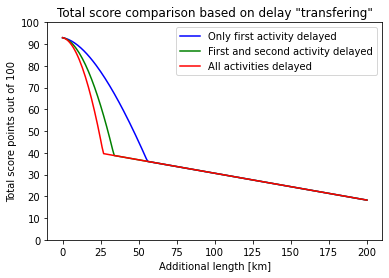

In [253]:
plt.plot(range(0,max_lim_range), scoresf, 'b')
plt.plot(range(0,max_lim_range), scoresf2, 'g')
plt.plot(range(0,max_lim_range), scoresf3, 'r')
plt.ylim([0,100])
plt.yticks(range(0,101, 10))
plt.title('Total score comparison based on delay "transfering"')
plt.xlabel("Additional length [km]")
plt.ylabel("Total score points out of 100")
plt.legend(["Only first activity delayed", "First and second activity delayed", "All activities delayed"])
plt.savefig('final_graphs/total_score_transfering.eps', format='eps')

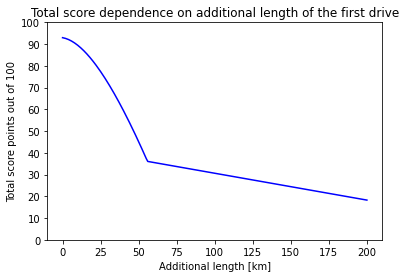

In [254]:
plt.plot(range(0,max_lim_range), scoresf, 'b')
plt.ylim([0,100])
plt.yticks(range(0,101, 10))
plt.title('Total score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Total score points out of 100")
plt.savefig('final_graphs/total_score.eps', format='eps')

In [255]:
plt.plot(range(0,max_lim_range), greensbsf, 'b')
plt.ylim([0,10])
plt.yticks(range(0,11))
plt.title('Green score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Green score points out of 10")
plt.savefig('final_graphs/green_score.eps', format='eps')

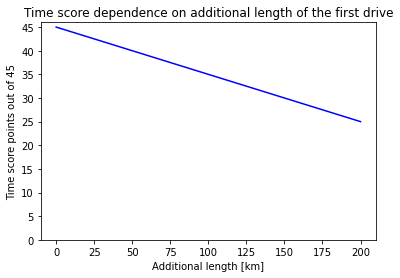

In [256]:
plt.plot(range(0,max_lim_range), timesbsf, 'b')
plt.ylim([0,46])
plt.yticks(range(0,46, 5))
plt.title('Time score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Time score points out of 45")
plt.savefig('final_graphs/time_score.eps', format='eps')

In [257]:
plt.plot(range(0,max_lim_range), pricesbsf, 'b')
plt.ylim([0,15])
plt.yticks(range(0,15))
plt.title('Price score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Price score points out of 15")
plt.savefig('final_graphs/price_score.eps', format='eps')